In [82]:
import polars as pl

| Coloana                        | Explicație                                                                 |
|-------------------------------|----------------------------------------------------------------------------|
| Înscriși pe liste permanente  | Numărul alegătorilor înscriși pe liste permanente                         |
| LP                            | Alegători prezenți pe liste permanente (LP = Liste Permanente)            |
| LS                            | Alegători prezenți pe liste suplimentare                                  |
| LSC                           | Alegători prezenți cu urna specială                                       |
| UM                            | Numărul total de alegători care au votat (LP + LS + LSC)                  |
| LT                            | Prezența totală exprimată în procente                                     |


In [83]:
import os

def listeaza_csv_din_folder(folder_path):
    """
    Returnează o listă cu toate fișierele .csv dintr-un folder dat.

    :param folder_path: Calea către folderul de interes
    :return: Listă de fișiere .csv
    """
    return [
        f for f in os.listdir(folder_path)
        if f.endswith('.csv') and os.path.isfile(os.path.join(folder_path, f))
    ]


In [84]:
tur1_2025 = listeaza_csv_din_folder('./data_total/04052025')
tur2_2025 = listeaza_csv_din_folder('./data_total/18052025')

## Total

In [85]:
votanti_04052025 = []
timp_04052025 = [path.split('.')[0].split('_')[2] for path in tur1_2025]

for path in tur1_2025:
    df = pl.read_csv(f'./data_total/04052025/{path}')
    votanti_04052025.append(df['LT'].sum())

votanti_18052025 = []
timp_18052025 = [path.split('.')[0].split('_')[2] for path in tur2_2025]

for path in tur2_2025:
    df = pl.read_csv(f'./data_total/18052025/{path}')
    votanti_18052025.append(df['LT'].sum())

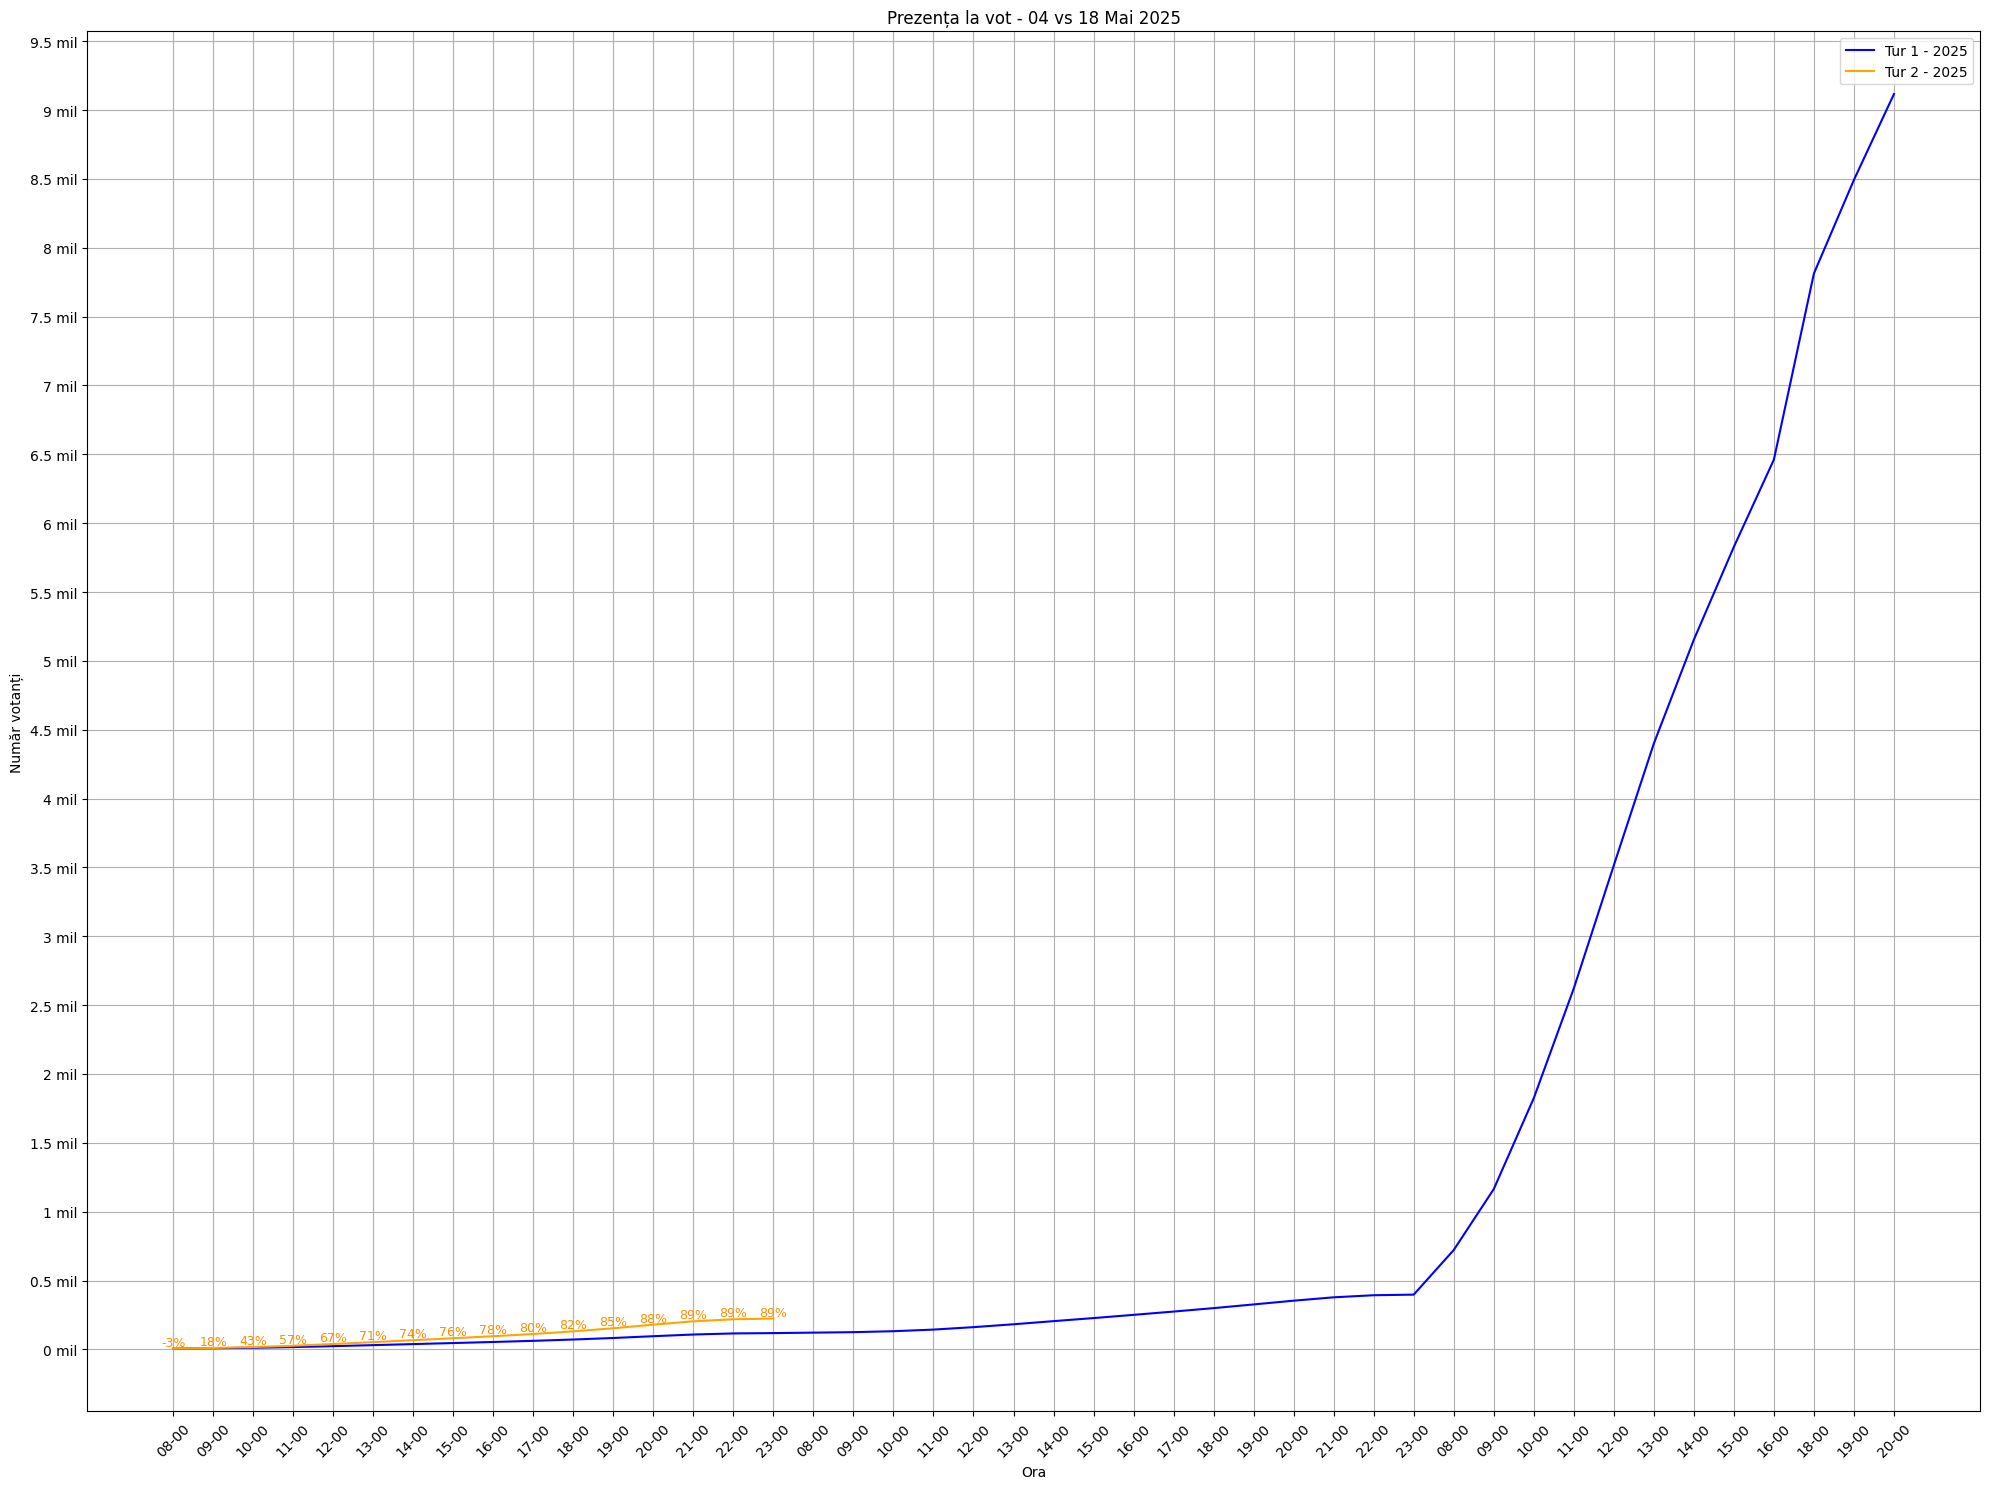

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(20, 15))

# Plotezi liniile complet
ax.plot(votanti_04052025, label='Tur 1 - 2025', color='blue')
ax.plot(votanti_18052025, label='Tur 2 - 2025', color='orange')

# Setezi xticks pentru întreaga lungime a axei X (maxim lungimea turului 1)
ax.set_xticks(range(len(timp_04052025)))
ax.set_xticklabels(timp_04052025, rotation=45)

max_v = max(max(votanti_04052025), max(votanti_18052025))
yticks = np.arange(0, max_v + 500_000, 500_000)
ax.set_yticks(yticks)

def mil_formatter(x, pos):
    val = x / 1_000_000
    if val == int(val):
        return f"{int(val)} mil"
    else:
        return f"{val:.1f} mil"

ax.yaxis.set_major_formatter(FuncFormatter(mil_formatter))

ax.set_xlabel("Ora")
ax.set_ylabel("Număr votanți")
ax.set_title("Prezența la vot - 04 vs 18 Mai 2025")
ax.legend()
ax.grid(True)

# Calculezi procentajele doar pe intervalul comun (min_len)
min_len = min(len(votanti_04052025), len(votanti_18052025))
vot1_trim = np.array(votanti_04052025[:min_len])
vot2_trim = np.array(votanti_18052025[:min_len])
timp_trim = timp_04052025[:min_len]

procent = (vot2_trim - vot1_trim) / vot1_trim * 100

# Afișezi procentajele doar pentru punctele din intervalul comun
for i, (x, y, p) in enumerate(zip(range(min_len), vot2_trim, procent)):
    ax.text(x, y, f"{p:.0f}%", color='darkorange', fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.savefig('votanti_2025.png', dpi=300, bbox_inches='tight')
plt.show()



## Diaspora

In [87]:
# diaspora = 'SR'

votanti_04052025 = []
timp_04052025 = [path.split('.')[0].split('_')[2] for path in tur1_2025]

for path in tur1_2025:
    df = pl.read_csv(f'./data_total/04052025/{path}')
    votanti_04052025.append(df.filter(pl.col('Judet') == 'SR')['LT'].sum())

votanti_18052025 = []
timp_18052025 = [path.split('.')[0].split('_')[2] for path in tur2_2025]

for path in tur2_2025:
    df = pl.read_csv(f'./data_total/18052025/{path}')
    votanti_18052025.append(df.filter(pl.col('Judet') == 'SR')['LT'].sum())

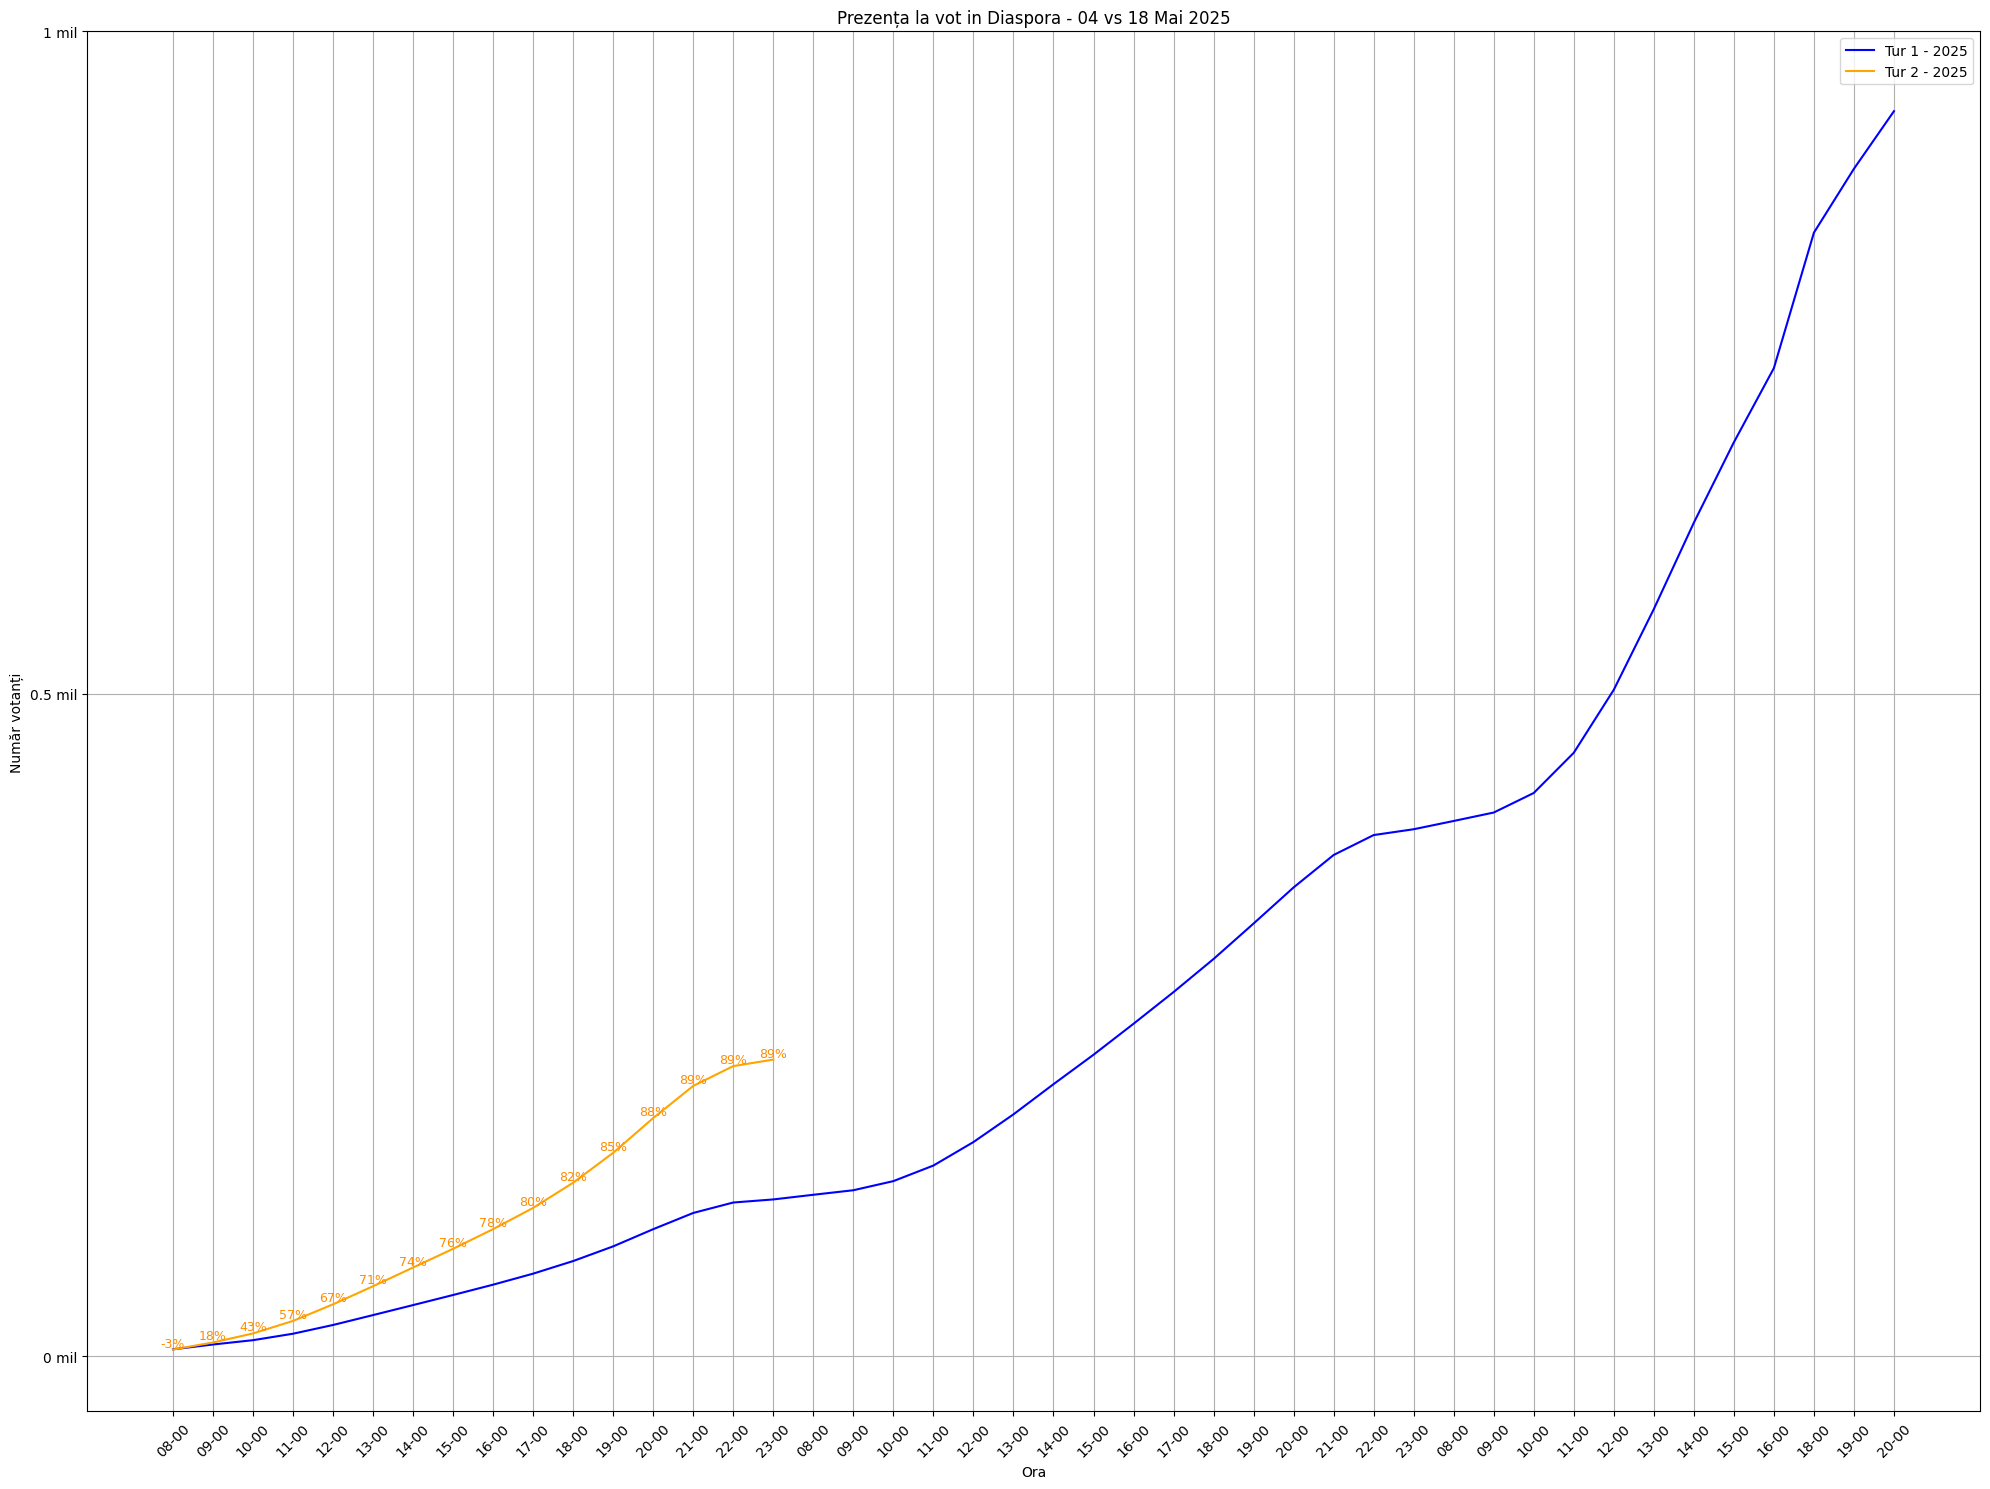

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(20, 15))

# Plotezi liniile complet
ax.plot(votanti_04052025, label='Tur 1 - 2025', color='blue')
ax.plot(votanti_18052025, label='Tur 2 - 2025', color='orange')

# Setezi xticks pentru întreaga lungime a axei X (maxim lungimea turului 1)
ax.set_xticks(range(len(timp_04052025)))
ax.set_xticklabels(timp_04052025, rotation=45)

max_v = max(max(votanti_04052025), max(votanti_18052025))
yticks = np.arange(0, max_v + 500_000, 500_000)
ax.set_yticks(yticks)

def mil_formatter(x, pos):
    val = x / 1_000_000
    if val == int(val):
        return f"{int(val)} mil"
    else:
        return f"{val:.1f} mil"

ax.yaxis.set_major_formatter(FuncFormatter(mil_formatter))

ax.set_xlabel("Ora")
ax.set_ylabel("Număr votanți")
ax.set_title("Prezența la vot in Diaspora - 04 vs 18 Mai 2025")
ax.legend()
ax.grid(True)

# Calculezi procentajele doar pe intervalul comun (min_len)
min_len = min(len(votanti_04052025), len(votanti_18052025))
vot1_trim = np.array(votanti_04052025[:min_len])
vot2_trim = np.array(votanti_18052025[:min_len])
timp_trim = timp_04052025[:min_len]

procent = (vot2_trim - vot1_trim) / vot1_trim * 100

# Afișezi procentajele doar pentru punctele din intervalul comun
for i, (x, y, p) in enumerate(zip(range(min_len), vot2_trim, procent)):
    ax.text(x, y, f"{p:.0f}%", color='darkorange', fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.savefig('votanti_diaspora_2025.png', dpi=300, bbox_inches='tight')
plt.show()



## Romania

In [92]:
# diaspora = 'SR'

votanti_04052025 = []
timp_04052025 = [path.split('.')[0].split('_')[2] for path in tur1_2025]

for path in tur1_2025:
    df = pl.read_csv(f'./data_total/04052025/{path}')
    votanti_04052025.append(df.filter(pl.col('Judet') != 'SR')['LT'].sum())

while len(votanti_04052025) > 0 and votanti_04052025[0] == 0:
    votanti_04052025.pop(0)
    timp_04052025.pop(0)

votanti_18052025 = []
timp_18052025 = [path.split('.')[0].split('_')[2] for path in tur2_2025]

for path in tur2_2025:
    df = pl.read_csv(f'./data_total/18052025/{path}')
    votanti_18052025.append(df.filter(pl.col('Judet') != 'SR')['LT'].sum())

while len(votanti_18052025) > 0 and votanti_18052025[0] == 0:
    votanti_18052025.pop(0)
    timp_18052025.pop(0)

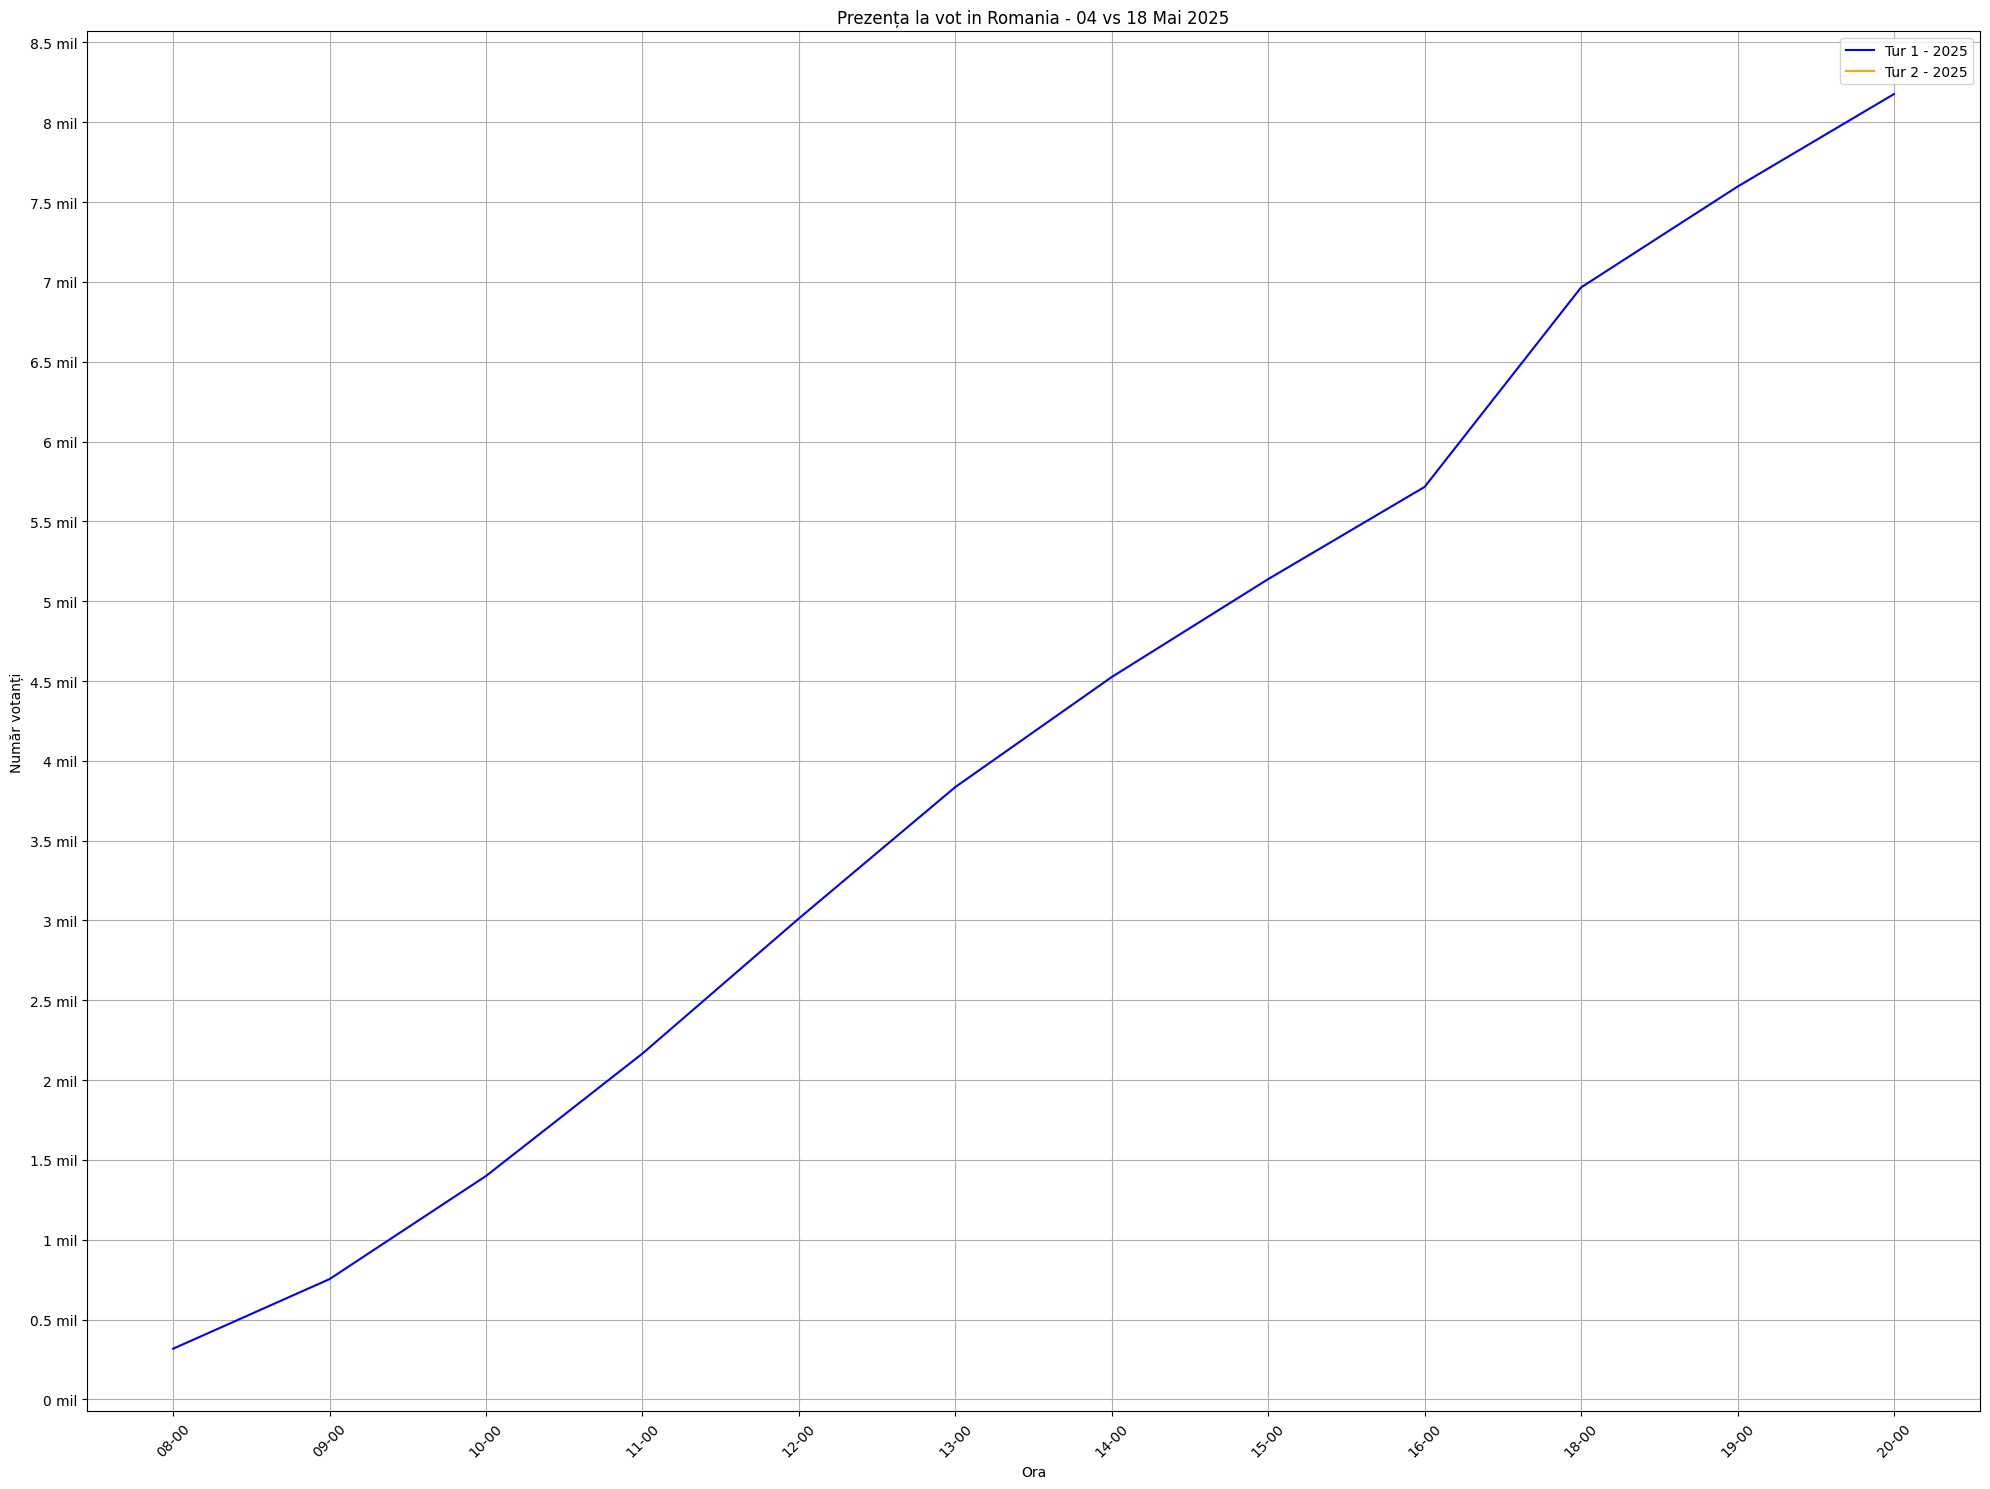

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(20, 15))

# Plotezi liniile complet
ax.plot(votanti_04052025, label='Tur 1 - 2025', color='blue')
ax.plot(votanti_18052025, label='Tur 2 - 2025', color='orange')

# Setezi xticks pentru întreaga lungime a axei X (maxim lungimea turului 1)
ax.set_xticks(range(len(timp_04052025)))
ax.set_xticklabels(timp_04052025, rotation=45)

all_vals = [v for v in votanti_04052025 + votanti_18052025 if v is not None]
max_v = max(all_vals) if all_vals else 0
yticks = np.arange(0, max_v + 500_000, 500_000)
ax.set_yticks(yticks)

def mil_formatter(x, pos):
    val = x / 1_000_000
    if val == int(val):
        return f"{int(val)} mil"
    else:
        return f"{val:.1f} mil"

ax.yaxis.set_major_formatter(FuncFormatter(mil_formatter))

ax.set_xlabel("Ora")
ax.set_ylabel("Număr votanți")
ax.set_title("Prezența la vot in Romania - 04 vs 18 Mai 2025")
ax.legend()
ax.grid(True)

# Calculezi procentajele doar pe intervalul comun (min_len)
min_len = min(len(votanti_04052025), len(votanti_18052025))
vot1_trim = np.array(votanti_04052025[:min_len])
vot2_trim = np.array(votanti_18052025[:min_len])
timp_trim = timp_04052025[:min_len]

procent = (vot2_trim - vot1_trim) / vot1_trim * 100

# Afișezi procentajele doar pentru punctele din intervalul comun
for i, (x, y, p) in enumerate(zip(range(min_len), vot2_trim, procent)):
    ax.text(x, y, f"{p:.0f}%", color='darkorange', fontsize=9, ha='center', va='bottom')

plt.tight_layout()
plt.savefig('votanti_romania_2025.png', dpi=300, bbox_inches='tight')
plt.show()

